In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import ensemble, feature_selection, preprocessing, model_selection, neighbors, svm

## Load the dataset

In [30]:
input_file = "data.csv"
df = pd.read_csv(input_file, header = 0)

In [31]:
dataset = df.values
X = dataset[:,1:7]
y = dataset[:,7]
y = y.astype('int')

## Apply Tree based feature selection

In [32]:
col = df.columns.tolist()
col = col[1:7]

In [33]:
clf = ensemble.ExtraTreesClassifier(n_estimators=50, random_state=1 )
clf = clf.fit(X, y)
imp = clf.feature_importances_

In [34]:
for i in range(len(col)):
    print(f"{col[i]}: {imp[i]}")

# Liquid Flow Rate (mL/min) : 0.14483210426997334
 Atomization O2 Flow Rate (L/min) : 0.1477811055370728
 Sheath O2 Flow Rate (L/min) : 0.15280741555924116
 ER1 (EtOH/AtomO2) : 0.19596983707417662
 ER2 (EtOH/AtomO2+SheathO2): 0.16812175746052432
Burner Cap Temperature: 0.19048778009901182


In [43]:
model = feature_selection.SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

In [44]:
sc = preprocessing.StandardScaler()
X_new = sc.fit_transform(X_new)

In [45]:
success = np.array([0.0,0.0,0.0])
failure = np.array([0.0,0.0,0.0])
for i in range(53):
    if y[i] == 0:
        failure = np.append(failure, X_new[i])
    else:
        success = np.append(success, X_new[i])
failure = failure.reshape((33,3))
success = success.reshape((22,3))

Stable: Orange, Unstable: Blue

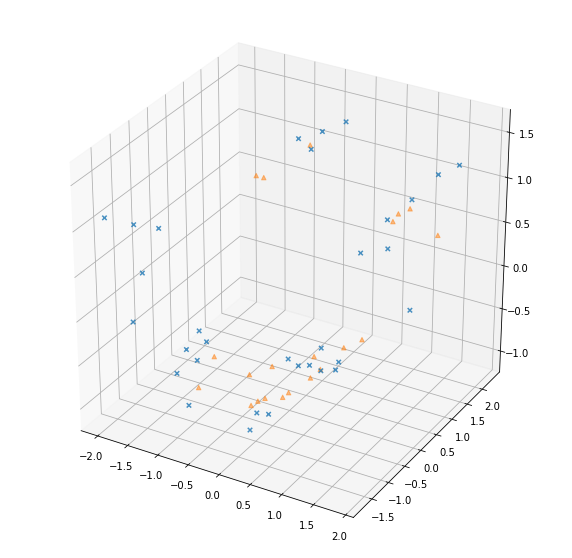

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(failure[1:, 0], failure[1:, 1], failure[1:, 2], alpha=0.8, marker="x")
ax.scatter(success[1:, 0], success[1:, 1], success[1:, 2], alpha=0.5, marker="^")

## Experimenting with models

In [80]:
X_train, X_cross, y_train, y_cross = model_selection.train_test_split(X_new, y, train_size=.8, random_state=1)
neigh = neighbors.KNeighborsClassifier()
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train)

0.6666666666666666

In [81]:
neigh.score(X_cross, y_cross)

0.45454545454545453

In [ ]:
X_train, X_cross, y_train, y_cross = model_selection.train_test_split(X_new, y, train_size=.8, random_state=1)
clf3 = svm.SVC(random_state=1)
clf3.fit(X_train, y_train)
clf3.score(X_train, y_train)

In [ ]:
clf3.score(X_cross, y_cross)
